In [83]:
import pandas as pd
df = pd.read_csv('production_data.csv', parse_dates=['Date'])


In [41]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      365 non-null    datetime64[ns]
 1   Production Output         336 non-null    float64       
 2   Worker Attendance         336 non-null    float64       
 3   Power Availability Hours  336 non-null    float64       
 4   Holiday                   365 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 14.4 KB


,Date,Production Output,Worker Attendance,Power Availability Hours,Holiday
count,365,336.000000,336.000000,336.000000,365.000000
mean,2023-07-02 00:00:00,996.151786,80.708333,16.547619,0.172603
min,2023-01-01 00:00:00,803.000000,60.000000,10.000000,0.000000
25%,2023-04-02 00:00:00,897.000000,70.000000,13.000000,0.000000
50%,2023-07-02 00:00:00,1001.000000,83.000000,17.000000,0.000000
75%,2023-10-01 00:00:00,1091.250000,91.000000,20.250000,0.000000
max,2023-12-31 00:00:00,1197.000000,99.000000,23.000000,1.000000
std,NaN,113.640245,11.875903,4.207044,0.378422


In [42]:
missing_values = df.isnull().sum()
missing_values

Date                         0
Production Output           29
Worker Attendance           29
Power Availability Hours    29
Holiday                      0
dtype: int64

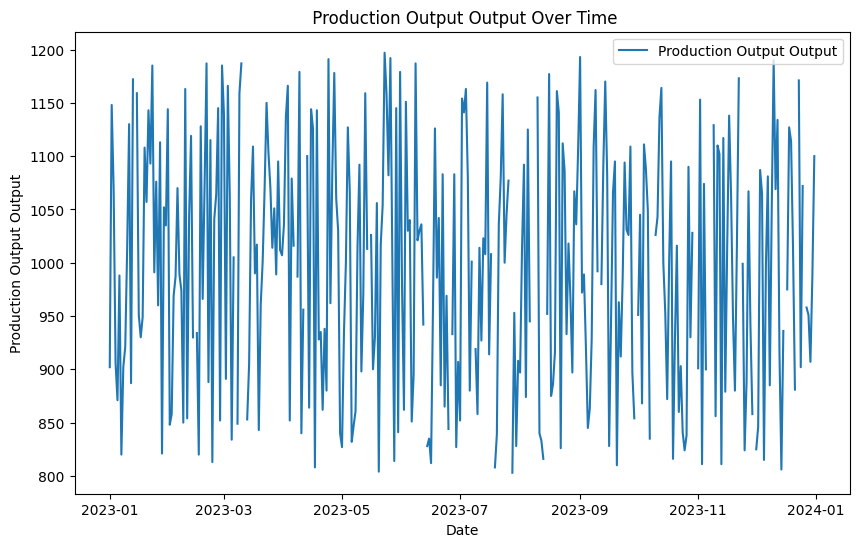

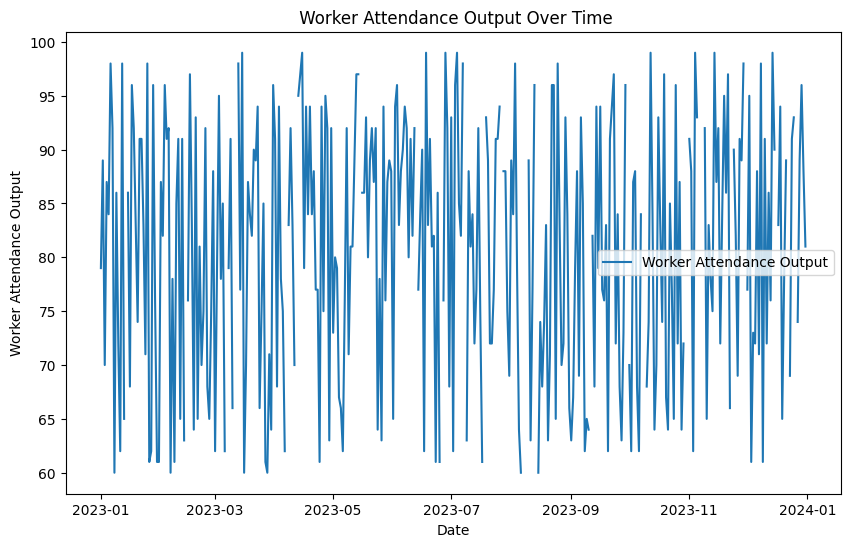

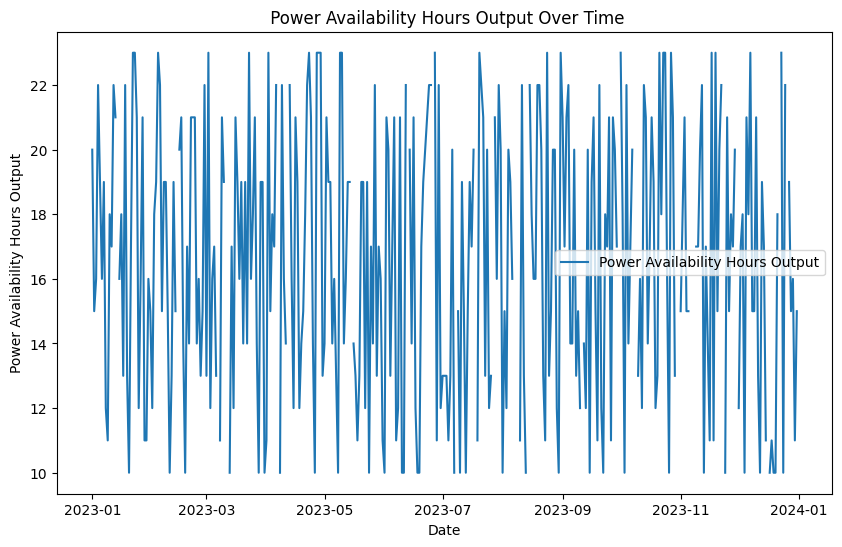

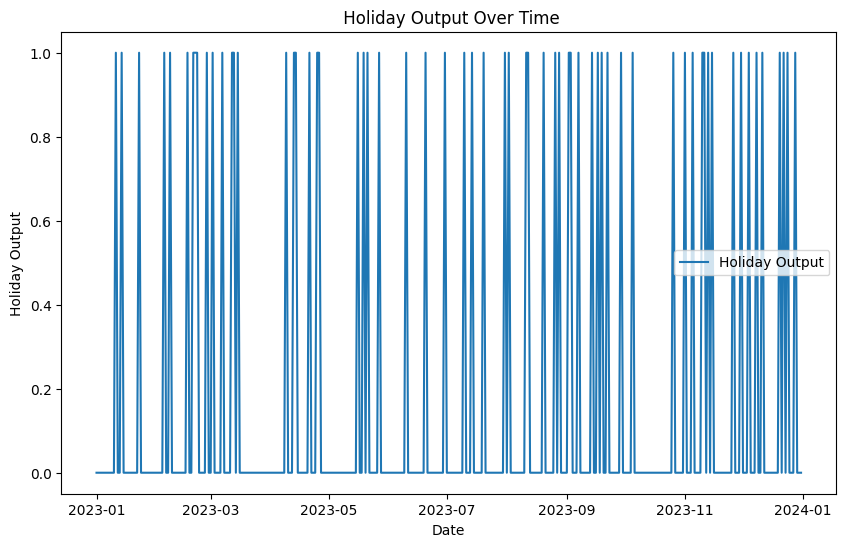

In [53]:
import matplotlib.pyplot as plt

for column in df.columns[1:]:
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df[column], label=f'{column} Output')
    plt.xlabel('Date')
    plt.ylabel(f'{column} Output')
    plt.title(f' {column} Output Over Time')
    plt.legend()
    plt.show()

In [84]:
max_power_hours = 23
df['Load Shedding Hours'] = (max_power_hours - df['Power Availability Hours']) + df['Holiday'] #adding holiday as a penalty of 1 hours

In [85]:
missing_values = df.isnull().sum()
missing_values

Date                         0
Production Output           29
Worker Attendance           29
Power Availability Hours    29
Holiday                      0
Load Shedding Hours         29
dtype: int64

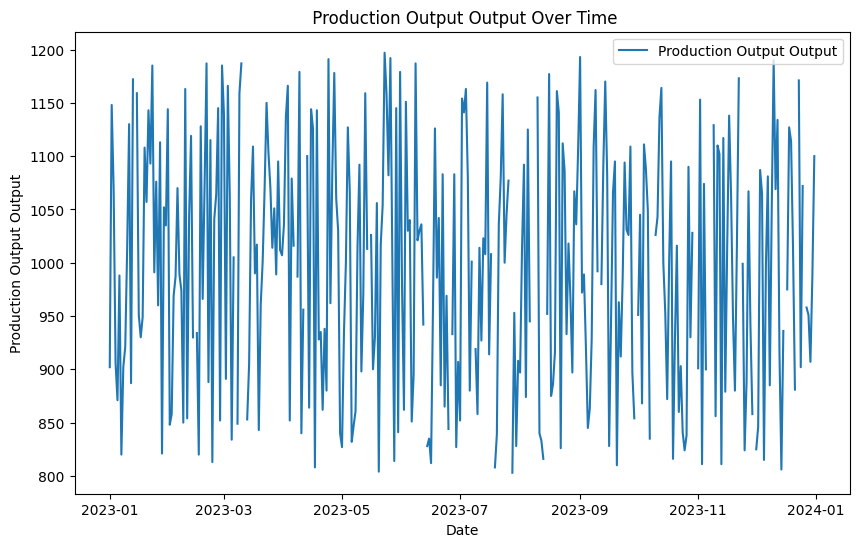

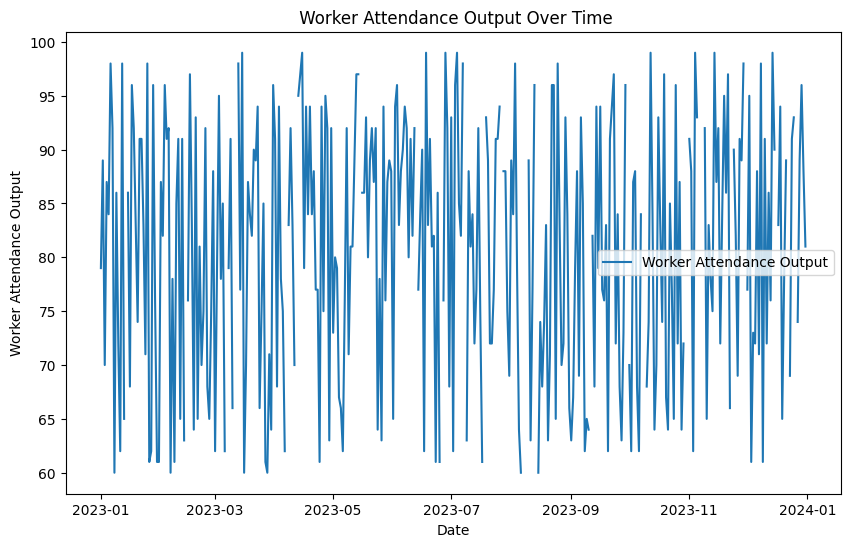

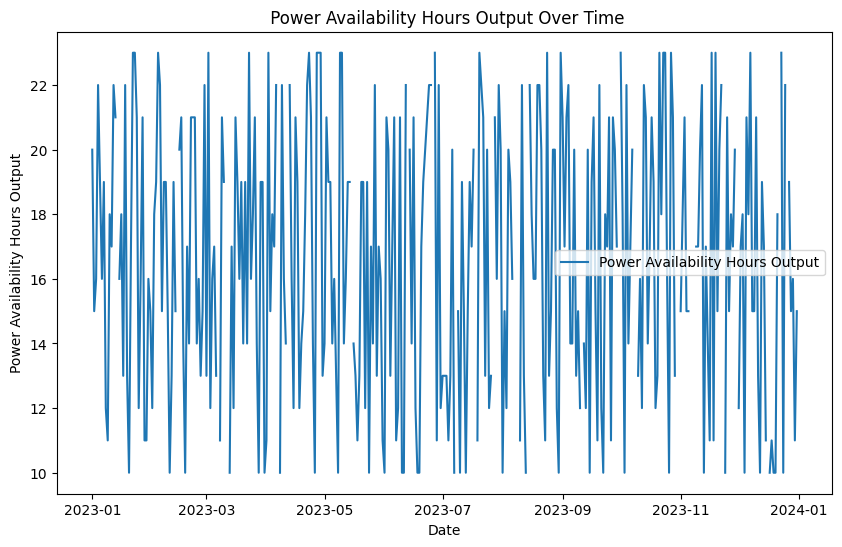

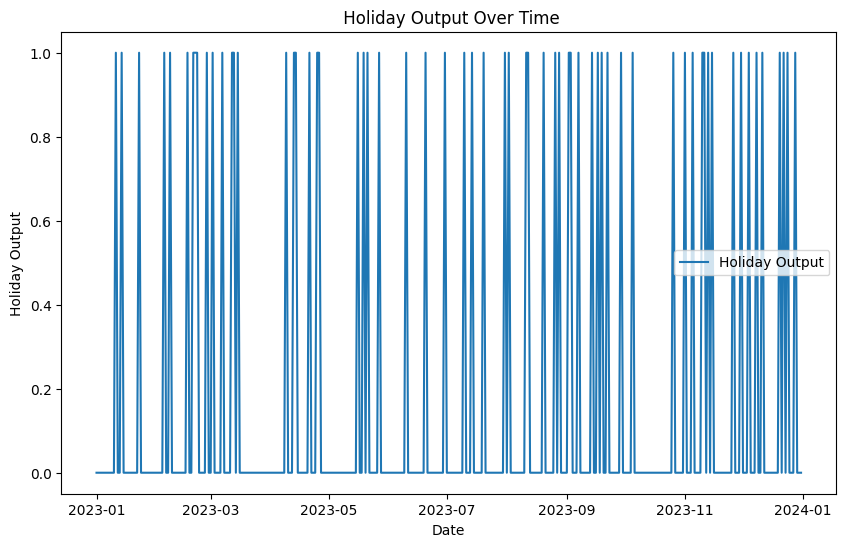

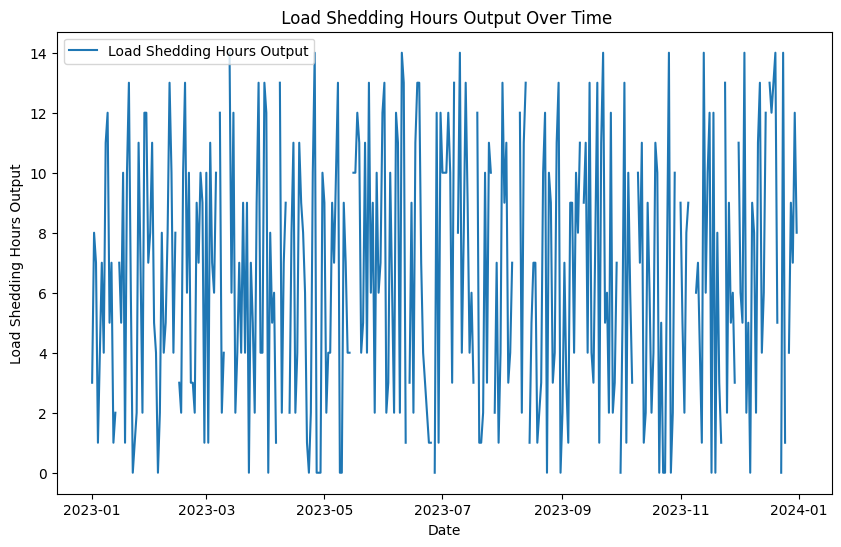

In [56]:
for column in df.columns[1:]:
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df[column], label=f'{column} Output')
    plt.xlabel('Date')
    plt.ylabel(f'{column} Output')
    plt.title(f' {column} Output Over Time')
    plt.legend()
    plt.show()

In [86]:
df['Production Output'] = df['Production Output'].interpolate(method='linear')
df['Worker Attendance'] = df['Worker Attendance'].interpolate(method='linear')
df['Power Availability Hours'] = df['Power Availability Hours'].interpolate(method='linear')
df['Load Shedding Hours'] = df['Load Shedding Hours'].interpolate(method='linear')
# Verify that there are no more missing values
df.isnull().sum()

Date                        0
Production Output           0
Worker Attendance           0
Power Availability Hours    0
Holiday                     0
Load Shedding Hours         0
dtype: int64

In [87]:
lastest_data = df.tail(30)

lastest_data.to_csv('lastest_data.csv', index=False)

In [60]:
correlation_matrix = df.corr()
correlation_matrix

,Date,Production Output,Worker Attendance,Power Availability Hours,Holiday,Load Shedding Hours
Date,1.000000,-0.075513,0.036565,-0.035891,0.049953,0.040938
Production Output,-0.075513,1.000000,-0.095424,-0.002343,-0.066171,-0.003663
Worker Attendance,0.036565,-0.095424,1.000000,-0.124594,0.035203,0.127956
Power Availability Hours,-0.035891,-0.002343,-0.124594,1.000000,-0.043564,-0.996064
Holiday,0.049953,-0.066171,0.035203,-0.043564,1.000000,0.126930
Load Shedding Hours,0.040938,-0.003663,0.127956,-0.996064,0.126930,1.000000


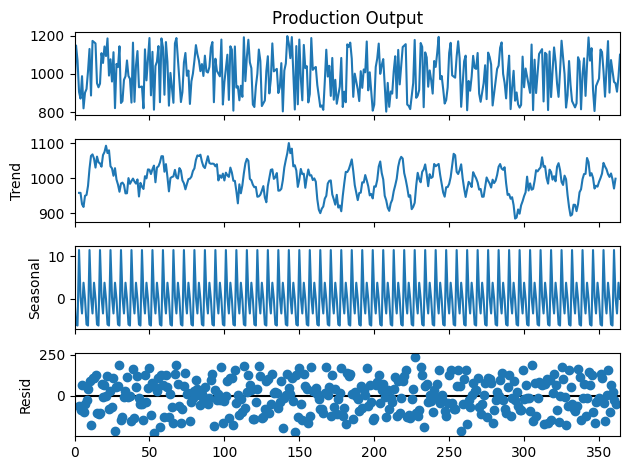

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Production Output'], model='additive', period=7)
decomposition.plot()
plt.show()